## Lecture-7 Tutorial
### Steady-state 2D heat conduction with Dirichlet boundary condition at all boundaries with a heat source at the centre
$$\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2} = -exp(-((x-x_c)^2+(y-y_c)^2))=f(x,y)$$ 


--------------------------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import arange, meshgrid
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# USER-DEFINED VARIABLES
x_start,x_end = -10,10
y_start,y_end = -10,10
x_c,y_c = 0,0
nx = 20
ny = 20
T_x0,T_y0 = 300,300       #boundary condition
T_xn,T_yn = 300,300
tolerance = 10**(-4)

In [3]:
dx = (x_end-x_start)/(nx-1)
dy = (y_end-y_start)/(ny-1)
x = np.linspace(x_start,x_end,nx)
y = np.linspace(y_start,y_end,ny)
x_arr, y_arr = np.meshgrid(x,y)
num_iterations = 0    # initializing the variable
L_inf_error = 1.0     # initializing the variable
L2_error    = 1.0     # initializing the variable
print(x_arr)

[[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
   -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
    0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
    5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
 [-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
   -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
    0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
    5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
 [-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
   -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
    0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
    5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
 [-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
   -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
    0.52631579   1.57894737   2.63157895   3.68421053   4.7

In [4]:
def f(x,y):
    return -10*np.exp(-((x-x_c)**2+(y-y_c)**2))

#### Defining $L_{2}$ error to calculate convergence:
$$ L_{2}^{error} = \sqrt{\frac{\sum \limits_{i,j=0,0}^{n_x,n_y} (T^{k+1}_{i,j}-T^k_{i,j})^2}{n_x.n_y}} $$

In [5]:
# function to calculate L_2 error
def L2_func():   
    numerator = 0.0
    for i in range(1,nx-1,1):
        for j in range(1,ny-1,1):
            numerator += (T[i,j]-T_n[i,j])**2
    L2_err = np.sqrt(numerator/((nx-2)*(ny-2)))
    return L2_err

#### Gauss-Jacobi Iteration
##### Initialization:

In [6]:
T = np.zeros((nx,ny))
fxy = np.zeros((nx,ny))
B   = np.zeros((nx,ny))

# apply BC: Dirichlet (fixed) boundary condition
T[:, 0] = T_y0
T[:, ny-1] = T_yn
T[0, :] = T_x0
T[nx-1, :] = T_xn

for i in range(1,nx-1):
    for j in range(1,ny-1):
        T[i,j] = T_x0
        fxy[i,j] = f(x[i],y[j])   #RHS exponential term need to be calculated once only
        B[i,j] = dx**2 * fxy[i,j]

In [7]:
while (L2_error > tolerance):
    T_n = np.copy(T)    # previous iteration, known

    for i in range(1,nx-1):
        for j in range(1,ny-1):
            T[i,j] = ( B[i,j]-(T_n[i-1,j]+T_n[i+1,j]+T_n[i,j-1]+T_n[i,j+1]) )/ (-4)
    
    
    num_iterations +=1

    ## Finding convergence
    L2_error = L2_func()

In [8]:
print('Total number of mesh points = ',((nx*ny)))
print('Tolerance = ',tolerance)
print('Number of iterations to converge = ',num_iterations)

Total number of mesh points =  400
Tolerance =  0.0001
Number of iterations to converge =  447


### Plot

<IPython.core.display.Javascript object>


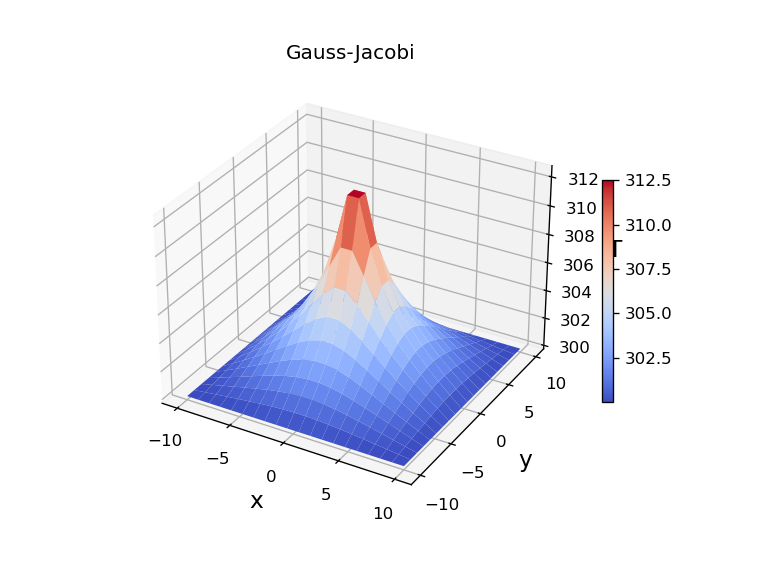

In [9]:
%matplotlib notebook
T2 = np.transpose(T)    
fig = plt.figure(0)
axes = fig.gca(projection ='3d') 
surf = axes.plot_surface(x_arr, y_arr, T2,cmap='coolwarm')
axes.set_xlabel('x', fontsize=14)
axes.set_ylabel('y', fontsize=14)
axes.set_zlabel('T', fontsize=14)
plt.title('Gauss-Jacobi')
fig.colorbar(surf, shrink=0.5, aspect=20)
plt.show()

#### Plotting convergence with mesh size
Number of interations for convergence have been calculated for different mesh sizes

In [10]:
N = [20,40]
num_iter_L2 = [443,1425]

#Convergence
N_sqr = np.multiply(N,N)
rL2_vs_Nsqr = (num_iter_L2[1]-num_iter_L2[0])/(N_sqr[1]-N_sqr[0])
print('Rate of convergence (L2 error)= ',"%.2f" % rL2_vs_Nsqr,'N^2')


Rate of convergence (L2 error)=  0.82 N^2
